In [368]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import (
    train_test_split,
    learning_curve,
    validation_curve,
    GridSearchCV,
)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, precision_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [369]:
digits = load_digits()
iris = load_iris()

In [370]:
scaler_digits = StandardScaler()
scaler_iris = StandardScaler()

In [371]:
X_digits_scaled = scaler_digits.fit_transform(digits.data)
X_iris_scaled = scaler_iris.fit_transform(iris.data)

In [372]:
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(
    X_digits_scaled, digits.target, test_size=0.3, random_state=42
)
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris_scaled, iris.target, test_size=0.3, random_state=42
)

In [373]:
def plot_learning_curve(estimator, X, y, title, scoring=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [374]:
def plot_validation_curve(
    estimator, X, y, param_name, param_range, title, scoring=None
):
    train_scores, test_scores = validation_curve(
        estimator,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    param_range_str = [str(p) for p in param_range]
    plt.plot(
        param_range_str, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        param_range_str,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score",
    )
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [375]:
def train_and_evaluate_mlp(X_train, y_train, X_test, y_test, param_grid):
    mlp = MLPClassifier(max_iter=2000, random_state=42)
    grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    best_mlp = grid_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    print("Classification Report (NN)")
    print(classification_report(y_test, y_pred))
    return best_mlp

In [376]:
param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
}

In [377]:
best_mlp_digits = train_and_evaluate_mlp(
    X_digits_train, y_digits_train, X_digits_test, y_digits_test, param_grid_mlp
)

Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.94      0.97        54
           4       0.98      1.00      0.99        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.93      0.98      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [378]:
best_mlp_iris = train_and_evaluate_mlp(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test, param_grid_mlp
)

Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [379]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, param_grid):
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(svm, param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test)
    print("Classification Report (SVM)")
    print(classification_report(y_test, y_pred))
    return best_svm

In [380]:
param_grid_svm = {
    "kernel": ["linear", "rbf", "poly"],
}

In [381]:
best_svm_digits = train_and_evaluate_svm(
    X_digits_train, y_digits_train, X_digits_test, y_digits_test, param_grid_svm
)

Classification Report (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      1.00      0.99        66
           6       0.98      1.00      0.99        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.98      0.93      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [382]:
best_svm_iris = train_and_evaluate_svm(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test, param_grid_svm
)

Classification Report (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [383]:
def min_samples_per_class(y):
    counter = Counter(y)
    return min(counter.values())

In [384]:
min_samples_digits = min_samples_per_class(y_digits_train)
min_samples_iris = min_samples_per_class(y_iris_train)

In [385]:
param_grid_knn_digits = {
    "n_neighbors": list(range(1, min_samples_digits + 1)),
}

In [386]:
param_grid_knn_iris = {
    "n_neighbors": list(range(1, min_samples_iris + 1)),
}

In [387]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, param_grid):
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    print("Classification Report (k-NN)")
    print(classification_report(y_test, y_pred))
    return best_knn

In [388]:
best_knn_digits = train_and_evaluate_knn(
    X_digits_train, y_digits_train, X_digits_test, y_digits_test, param_grid_knn_digits
)

Classification Report (k-NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      1.00      0.97        50
           2       0.94      0.98      0.96        47
           3       0.94      0.93      0.93        54
           4       0.98      0.98      0.98        60
           5       0.98      0.97      0.98        66
           6       0.96      1.00      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.93      0.94        43
           9       0.95      0.90      0.92        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [389]:
best_knn_iris = train_and_evaluate_knn(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test, param_grid_knn_iris
)

Classification Report (k-NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [390]:
precision_scorer = make_scorer(precision_score, average="micro")

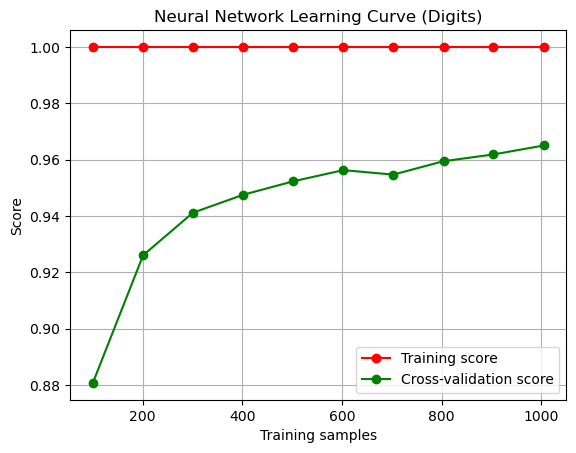

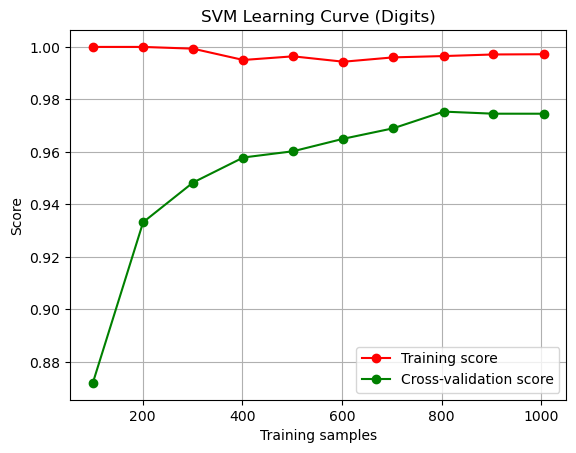

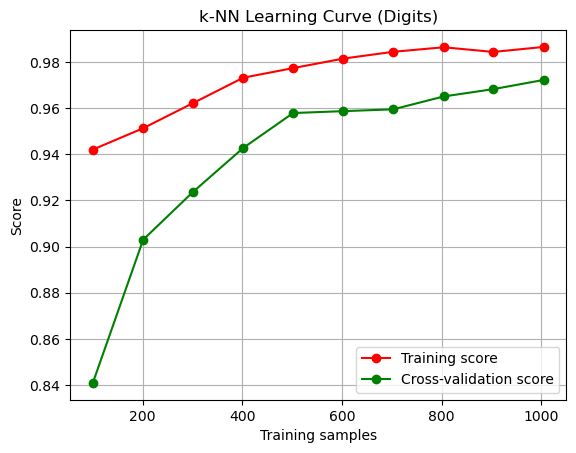

In [391]:
plot_learning_curve(
    best_mlp_digits,
    X_digits_train,
    y_digits_train,
    "Neural Network Learning Curve (Digits)",
    scoring=precision_scorer,
)
plot_learning_curve(
    best_svm_digits,
    X_digits_train,
    y_digits_train,
    "SVM Learning Curve (Digits)",
    scoring=precision_scorer,
)
plot_learning_curve(
    best_knn_digits,
    X_digits_train,
    y_digits_train,
    "k-NN Learning Curve (Digits)",
    scoring=precision_scorer,
)

In [392]:
if (
    hasattr(best_knn_iris, "n_neighbors")
    and best_knn_iris.n_neighbors > min_samples_iris
):
    best_knn_iris.n_neighbors = min_samples_iris

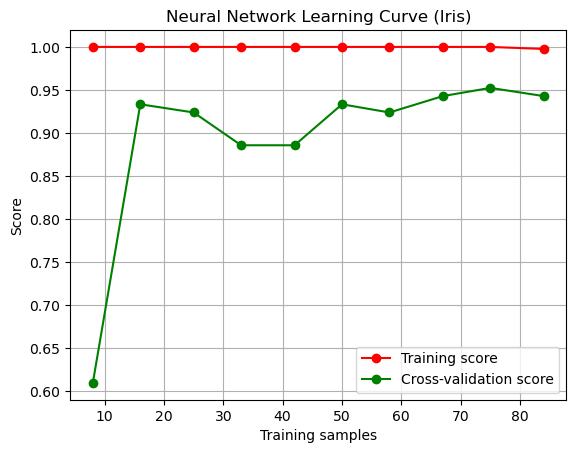

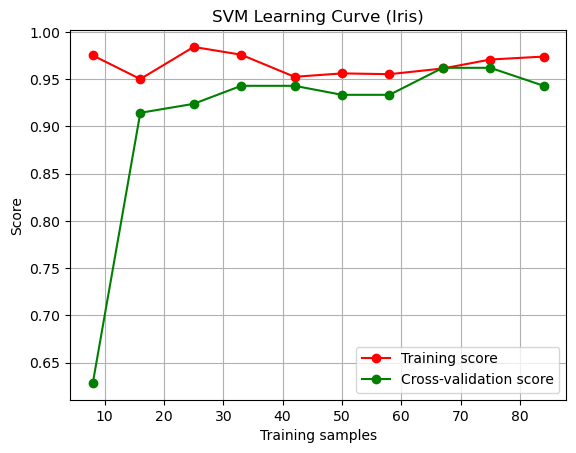

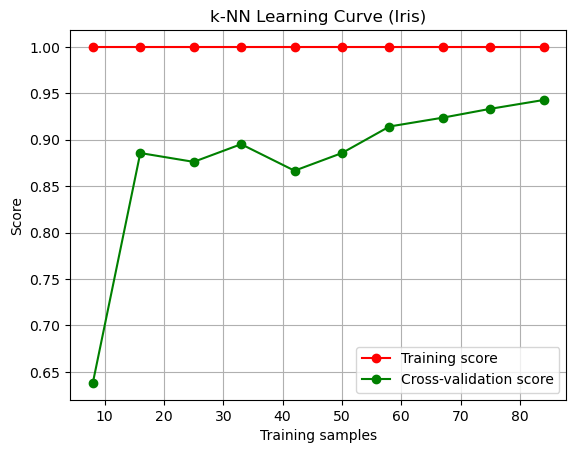

In [393]:
plot_learning_curve(
    best_mlp_iris,
    X_iris_train,
    y_iris_train,
    "Neural Network Learning Curve (Iris)",
    scoring=precision_scorer,
)
plot_learning_curve(
    best_svm_iris,
    X_iris_train,
    y_iris_train,
    "SVM Learning Curve (Iris)",
    scoring=precision_scorer,
)
plot_learning_curve(
    best_knn_iris,
    X_iris_train,
    y_iris_train,
    "k-NN Learning Curve (Iris)",
    scoring=precision_scorer,
)

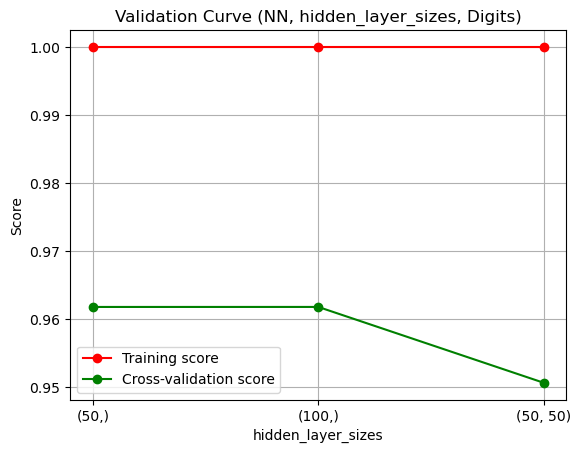

In [394]:
plot_validation_curve(
    MLPClassifier(max_iter=2000, random_state=42),
    X_digits_train,
    y_digits_train,
    param_name="hidden_layer_sizes",
    param_range=[(50,), (100,), (50, 50)],
    title="Validation Curve (NN, hidden_layer_sizes, Digits)",
    scoring=precision_scorer,
)

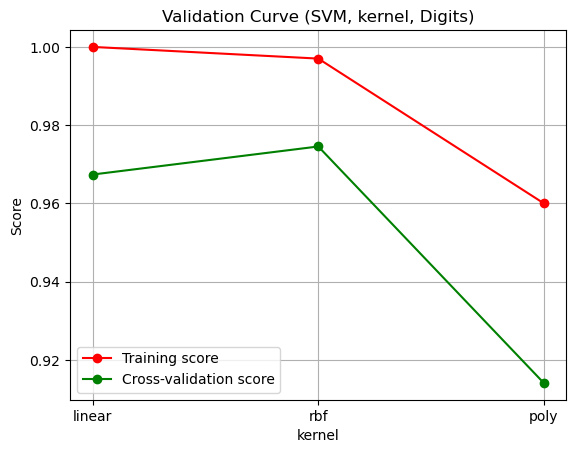

In [395]:
plot_validation_curve(
    SVC(random_state=42),
    X_digits_train,
    y_digits_train,
    param_name="kernel",
    param_range=["linear", "rbf", "poly"],
    title="Validation Curve (SVM, kernel, Digits)",
    scoring=precision_scorer,
)

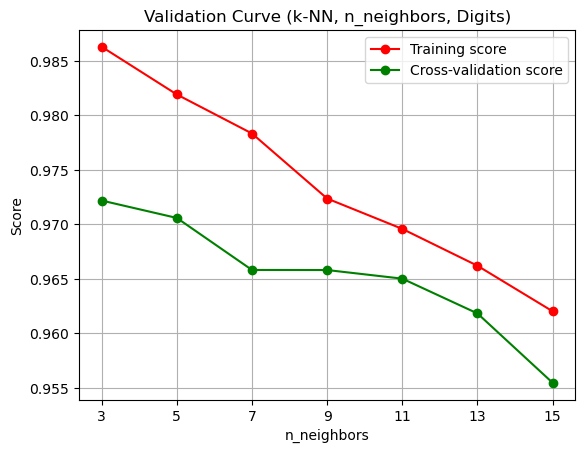

In [396]:
plot_validation_curve(
    KNeighborsClassifier(),
    X_digits_train,
    y_digits_train,
    param_name="n_neighbors",
    param_range=[3, 5, 7, 9, 11, 13, 15],
    title="Validation Curve (k-NN, n_neighbors, Digits)",
    scoring=precision_scorer,
)

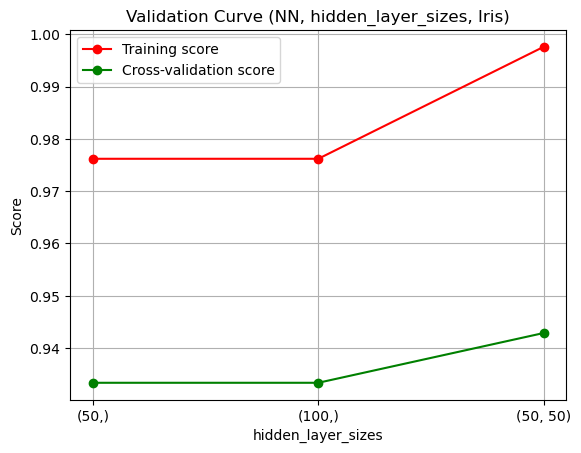

In [397]:
plot_validation_curve(
    MLPClassifier(max_iter=2000, random_state=42),
    X_iris_train,
    y_iris_train,
    param_name="hidden_layer_sizes",
    param_range=[(50,), (100,), (50, 50)],
    title="Validation Curve (NN, hidden_layer_sizes, Iris)",
    scoring=precision_scorer,
)

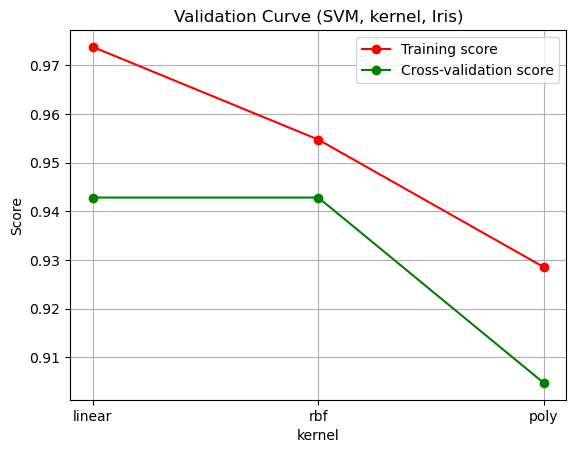

In [398]:
plot_validation_curve(
    SVC(random_state=42),
    X_iris_train,
    y_iris_train,
    param_name="kernel",
    param_range=["linear", "rbf", "poly"],
    title="Validation Curve (SVM, kernel, Iris)",
    scoring=precision_scorer,
)

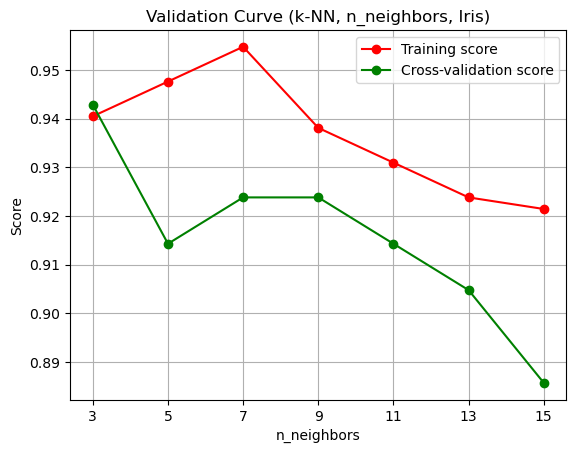

In [399]:
plot_validation_curve(
    KNeighborsClassifier(),
    X_iris_train,
    y_iris_train,
    param_name="n_neighbors",
    param_range=[3, 5, 7, 9, 11, 13, 15],
    title="Validation Curve (k-NN, n_neighbors, Iris)",
    scoring=precision_scorer,
)